In [1]:
# import modules here
from prep_data import *
from visualizations import *
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# data files
EXPERIMENT_1 = 'data/experiment1_data.csv'
EXPERIMENT_2 = 'data/experiment2_data.csv'

# Binary Models

## Experiment 1

In [3]:
# prepare the data
mode = 4 
x_train, x_test, y_train, y_test = binary_prep(EXPERIMENT_1, mode, seed=None)
class_names = ['1', '0'] # 1 means an app was opened, 0 means nothing happened

### Dummy Classifier

Let's see how accurate we are when we use a classifier that learns nothing...

             precision    recall  f1-score   support

          0       0.38      0.32      0.34        19
          1       0.46      0.52      0.49        21

avg / total       0.42      0.42      0.42        40



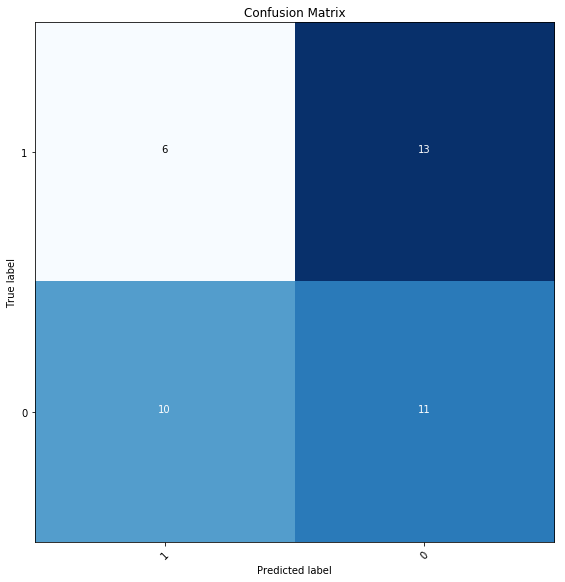

In [4]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)
# Make predictions
y_pred = dummy.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

It looks like the results are pretty bad...

### Support Vector Machine

In [5]:
# still need to do cross validation and grid search
svc = LinearSVC()
svc.fit(x_train, y_train)
joblib.dump(svc, 'saved_models/e1_binary_svm_m_' + str(mode) + '.pkl')

['saved_models/e1_binary_svm_m_4.pkl']

             precision    recall  f1-score   support

          0       0.48      0.79      0.60        19
          1       0.56      0.24      0.33        21

avg / total       0.52      0.50      0.46        40



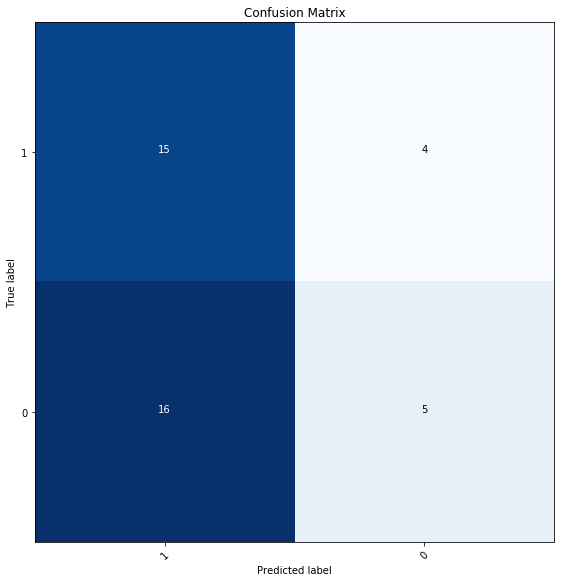

In [6]:
# Make predictions
y_pred = svc.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

### Logistic Regression

In [7]:
# still need to do cross validation and grid search
lr = LogisticRegression()
lr.fit(x_train, y_train)
joblib.dump(lr, 'saved_models/e1_binary_lr_m_' + str(mode) + '.pkl')

['saved_models/e1_binary_lr_m_4.pkl']

             precision    recall  f1-score   support

          0       0.74      0.74      0.74        19
          1       0.76      0.76      0.76        21

avg / total       0.75      0.75      0.75        40



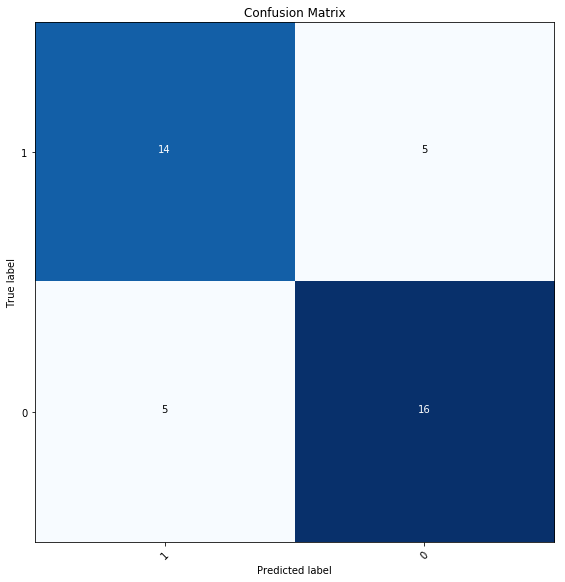

In [8]:
# Make predictions
y_pred = lr.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

### Random Forest

In [9]:
kFold = 5
param_grid = {'n_estimators': np.arange(10, 411, 100),
                'max_features': np.array(['sqrt', 'log2'])}
forest_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=kFold)

forest_grid.fit(x_train, y_train)
best_n = forest_grid.best_params_['n_estimators']
best_f = forest_grid.best_params_['max_features']

print("Best n estimators:    %f" % best_n)
print("Best max features:    %s" % best_f)

# rf = RandomForestClassifier()
# rf.fit(x_train, y_train)
joblib.dump(forest_grid, 'saved_models/e1_binary_rf_m_' + str(mode) + '.pkl')

Best n estimators:    110.000000
Best max features:    sqrt


['saved_models/e1_binary_rf_m_4.pkl']

             precision    recall  f1-score   support

          0       0.94      0.89      0.92        19
          1       0.91      0.95      0.93        21

avg / total       0.93      0.93      0.92        40



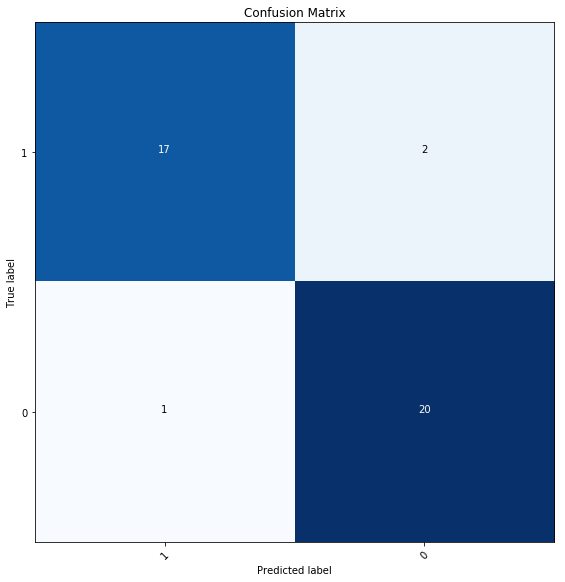

In [10]:
# Make predictions
y_pred = forest_grid.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

In [11]:
# I want to save these results to a txt file so I can view later
of_name = 'model_results/e1_binary_rf_m_' + str(mode) + '.txt'
of = open(of_name, 'w')

of.write("Results of Grid Search:\n")
of.write("\tBest n estimators:      %f\n" % best_n)
of.write("\tBest max features:      %s\n" % best_f)
of.write("\t---\n")
of.write("\tBest Score:           %f\n\n" % forest_grid.best_score_)
of.write("Results on Test Data:\n")
of.write("\tScore:                %f\n" % forest_grid.score(x_test, y_test))

of.close()

## Experiment 2

In [12]:
# prepare the data
mode = 4 
x_train, x_test, y_train, y_test = binary_prep(EXPERIMENT_2, mode, seed=None)
class_names = ['1', '0'] # 1 means an app was opened, 0 means nothing happened

### Dummy Classifier

             precision    recall  f1-score   support

          0       0.56      0.51      0.53        78
          1       0.53      0.57      0.55        74

avg / total       0.54      0.54      0.54       152



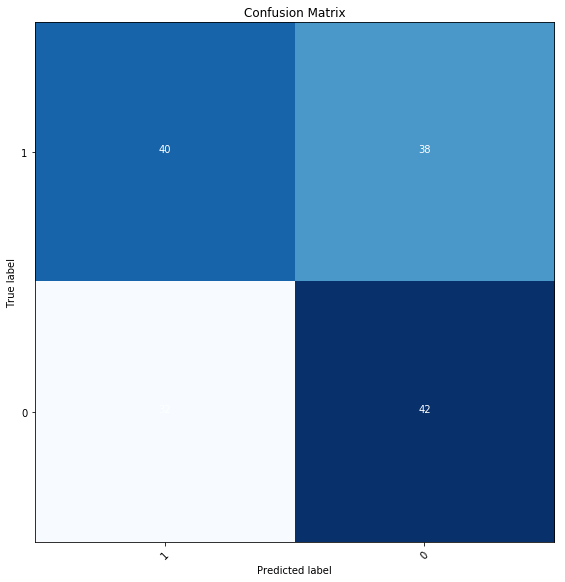

In [13]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)
# Make predictions
y_pred = dummy.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

### Support Vector Machine

In [14]:
# still need to do cross validation and grid search
svc = LinearSVC()
svc.fit(x_train, y_train)
joblib.dump(svc, 'saved_models/e2_binary_svm_m_' + str(mode) + '.pkl')

['saved_models/e2_binary_svm_m_4.pkl']

             precision    recall  f1-score   support

          0       0.65      0.94      0.76        78
          1       0.87      0.46      0.60        74

avg / total       0.76      0.70      0.69       152



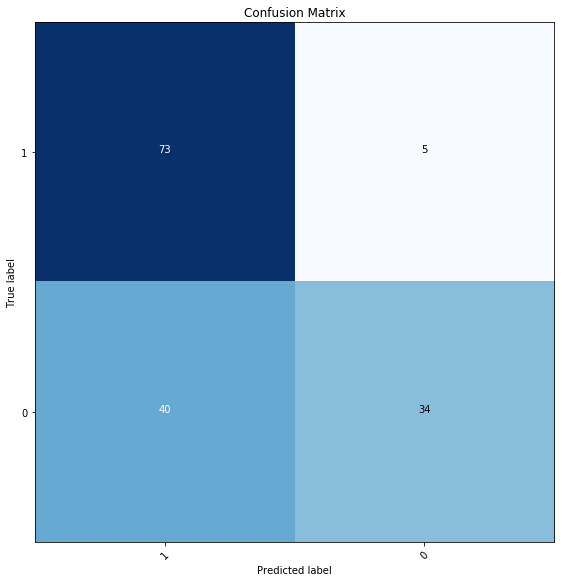

In [15]:
# Make predictions
y_pred = svc.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

### Logistic Regression

In [16]:
# still need to do cross validation and grid search
lr = LogisticRegression()
lr.fit(x_train, y_train)
joblib.dump(lr, 'saved_models/e2_binary_lr_m_' + str(mode) + '.pkl')

['saved_models/e2_binary_lr_m_4.pkl']

             precision    recall  f1-score   support

          0       0.68      0.97      0.80        78
          1       0.95      0.51      0.67        74

avg / total       0.81      0.75      0.74       152



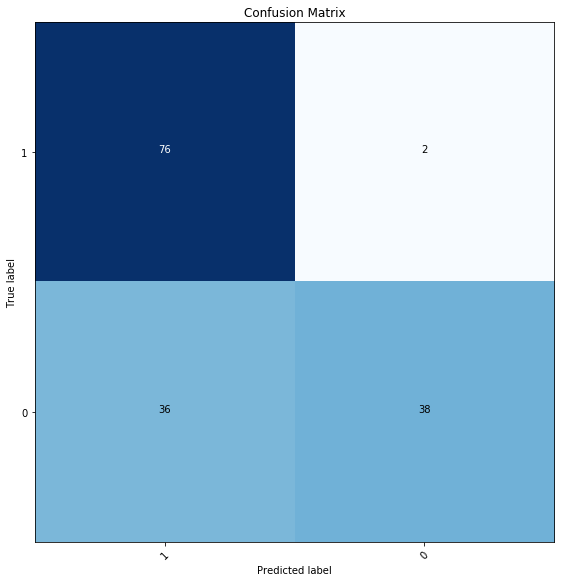

In [17]:
# Make predictions
y_pred = lr.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

### Random Forest

In [18]:
kFold = 5
param_grid = {'n_estimators': np.arange(10, 411, 100),
                'max_features': np.array(['sqrt', 'log2'])}
forest_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=kFold)

forest_grid.fit(x_train, y_train)
best_n = forest_grid.best_params_['n_estimators']
best_f = forest_grid.best_params_['max_features']

print("Best n estimators:    %f" % best_n)
print("Best max features:    %s" % best_f)

# rf = RandomForestClassifier()
# rf.fit(x_train, y_train)
joblib.dump(forest_grid, 'saved_models/e2_binary_rf_m_' + str(mode) + '.pkl')

Best n estimators:    210.000000
Best max features:    log2


['saved_models/e2_binary_rf_m_4.pkl']

             precision    recall  f1-score   support

          0       0.70      0.83      0.76        78
          1       0.78      0.62      0.69        74

avg / total       0.74      0.73      0.73       152



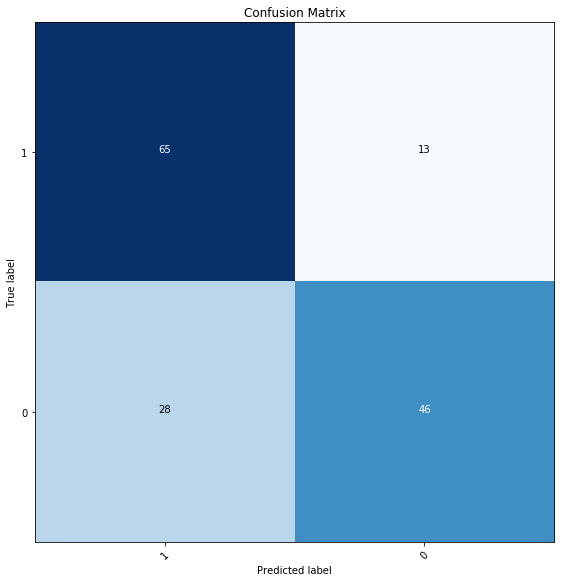

In [19]:
# Make predictions
y_pred = forest_grid.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

In [20]:
# I want to save these results to a txt file so I can view later
of_name = 'model_results/e2_binary_rf_m_' + str(mode) + '.txt'
of = open(of_name, 'w')

of.write("Results of Grid Search:\n")
of.write("\tBest n estimators:      %f\n" % best_n)
of.write("\tBest max features:      %s\n" % best_f)
of.write("\t---\n")
of.write("\tBest Score:           %f\n\n" % forest_grid.best_score_)
of.write("Results on Test Data:\n")
of.write("\tScore:                %f\n" % forest_grid.score(x_test, y_test))

of.close()